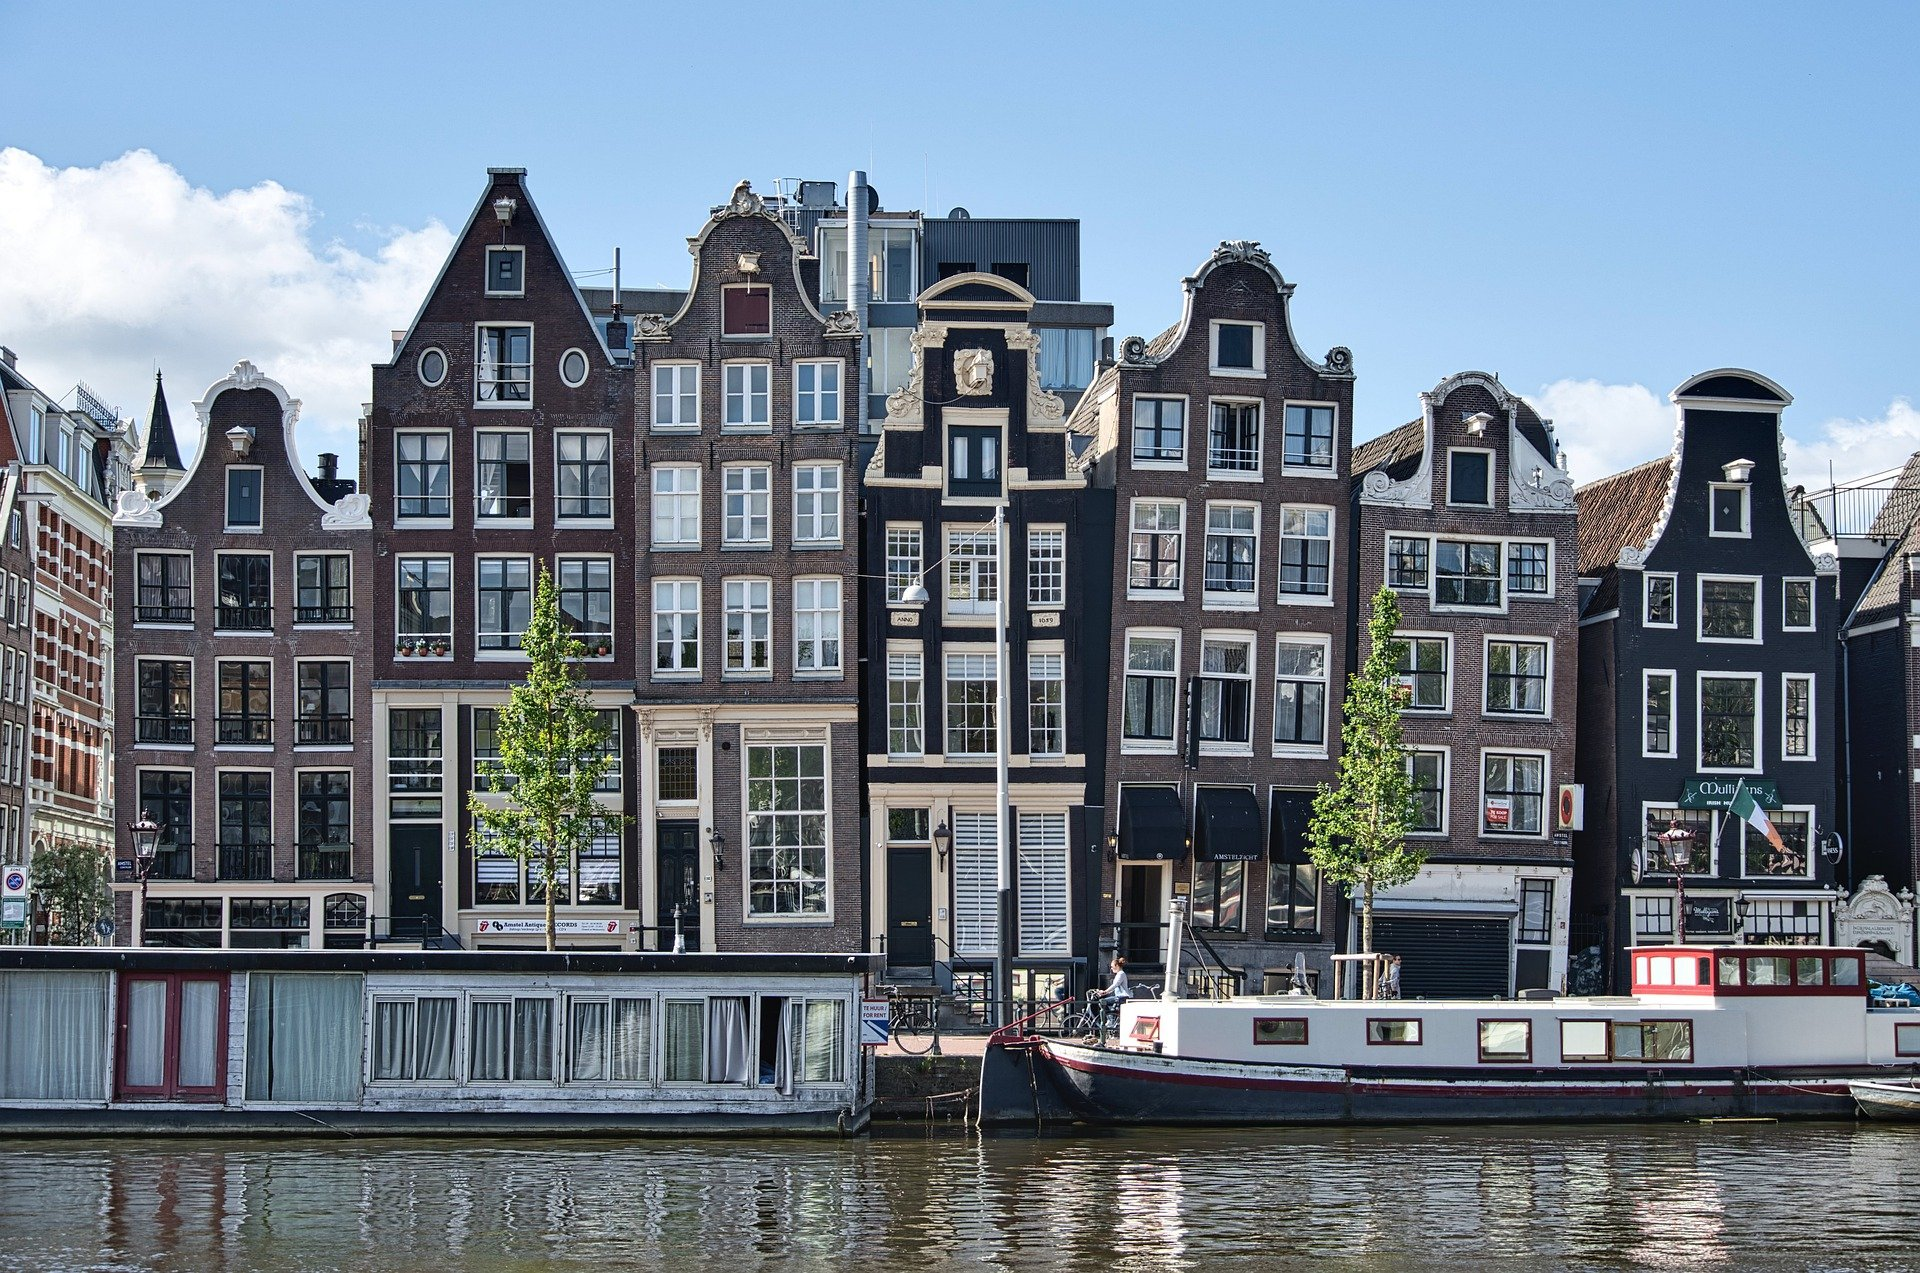

In [35]:
from PIL import Image
filename = 'buildings.jpg'

with Image.open(filename) as img: # read and load the file into memory, with is used to close the file as soon as it is not needed anymore
    img.load()

type(img)

isinstance(img, Image.Image)

img.show()

In [19]:
# Format, size and mode
print(img.format)

print(img.size)

img.mode

JPEG
(1920, 1273)


'RGB'

(400, 850)


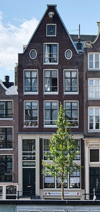

In [21]:
# Crop images
cropped_img = img.crop((300, 150, 700, 1000)) # 4 element tuple: left, upper, right, bottom edges
print(cropped_img.size)

low_res_img = cropped_img.resize((cropped_img.width // 4, cropped_img.height // 4)) # using floor division operator we set new width and height to a quarter of their original values

low_res_img.show()

# Resize images - inserts new height and width to the image
# img = img.resize((500, 500))
# img.show()

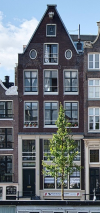

In [22]:
# Reduce image
low_res_img = cropped_img.reduce(4)
low_res_img.show()

In [23]:
# Save images
cropped_img.save("cropped_img.jpg")
low_res_img.save("low_resolution_cropped_image.png")

In [ ]:
# Basic image manipulation
converted_img = img.transpose(Image.TRANSVERSE)
converted_img.show()

In [ ]:
rotated_img = img.rotate(45, expand=True)
rotated_img.show()

In [ ]:
# Bands and modes of an image

filename = "strawberry.jpg"

with Image.open(filename) as img:
    img.load()

cmyk_img = img.convert("CMYK")
gray_img = img.convert("L") # Grayscale

cmyk_img.show()
gray_img.show()

img.getbands()
cmyk_img.getbands()
gray_img.getbands()

In [ ]:
red, green, blue = img.split()
red.mode
green.mode
blue.mode

zeroed_band = red.point(lambda _: 0)

red_merge = Image.merge(
    "RGB", (red, zeroed_band, zeroed_band)
)

green_merge = Image.merge(
    "RGB", (zeroed_band, red, zeroed_band)
)

blue_merge = Image.merge(
    "RGB", (zeroed_band, zeroed_band, red)
)

red_merge.show()
green_merge.show()
blue_merge.show()


In [ ]:
# Image processing Pillow

# Image filters and Convolution Kernels


In [ ]:
# Image blurring, sharpening and smoothing
from PIL import ImageFilter

blur_img = img.filter(ImageFilter.BLUR)
blur_img.show()

img.filter(ImageFilter.BoxBlur(20)).show()

# Gaussian blur

img.filter(ImageFilter.GaussianBlur(20)).show() # Gaussian blur stavlja vise tezine na centralnom pikselu

sharp_img = img.filter(ImageFilter.SHARPEN)
sharp_img.show()

smooth_img = img.filter(ImageFilter.SMOOTH)
smooth_img.show()

In [ ]:
# Edge detection, enhancement and embossing

img_gray = img.convert("L")
#edges = img_gray.filter(ImageFilter.FIND_EDGES)
edges_smooth = img_gray.filter(ImageFilter.EMBOSS)
edges_smooth.show()

In [ ]:
# Image segmentation and superimposition

# Image thresholding

filename_cat = "cat.jpg"

with Image.open(filename_cat) as img_cat:
    img_cat.load()

img_cat = img_cat.crop((800,0,1650,1281))
img_cat.show()


In [ ]:
img_cat_gray = img_cat.convert("L")
img_cat_gray.show()

threshold = 100

img_cat_threshold = img_cat_gray.point(
    lambda x: 255 if x > threshold else 0
)

img_cat_threshold.show()

In [ ]:
red, green, blue = img_cat.split()
red.show()
green.show()
blue.show()

In [ ]:
threshold = 57 # zasto bas ovaj broj?
img_cat_threshold = blue.point(lambda x: 255 if x > threshold else 0)
img_cat_threshold = img_cat_threshold.convert("1") # konvertujemo sliku u binarni mod
img_cat_threshold.show()

In [63]:
# Erosion and dilation
filename = "dot_and_hole.jpg"

with Image.open(filename) as img:
    img.load()

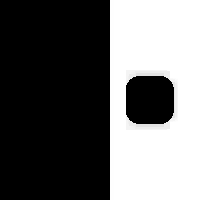

In [64]:
for _ in range(10):
    img = img.filter(ImageFilter.MinFilter(3))

img.show()

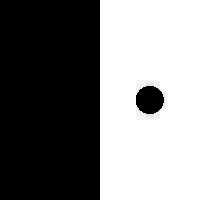

In [65]:
for _ in range(10):
    img = img.filter(ImageFilter.MaxFilter(3))

img.show()

In [67]:
def erode(cycles, image):
    for _ in range(cycles):
        image = image.filter(ImageFilter.MinFilter(3))
    return image

In [68]:
def dilate(cycles, image):
    for _ in range(cycles):
        image = image.filter(ImageFilter.MaxFilter(3))
    return image

In [ ]:
# Image segmentation using threshold
step_1 = erode(12, img_cat_threshold)
step_1.show()

In [ ]:
# Dilate
step_2 = dilate(58, step_1)
step_2.show()

In [ ]:
# Erode
cat_mask = erode(45, step_2)
cat_mask.show()

In [ ]:
# Smooth the mask
cat_mask = cat_mask.convert("L")
cat_mask = cat_mask.filter(ImageFilter.BoxBlur(20))
cat_mask.show()

In [ ]:
# Extract the image of the cat from its background
blank = img_cat.point(lambda _ : 0)
cat_segmented = Image.composite(img_cat, blank, cat_mask)
cat_segmented.show()

In [ ]:
# Superimposition of images using Image.paste()
filename_monastery = "monastery.jpg"

with Image.open(filename_monastery) as img_monastery:
    img_monastery.load()

img_monastery.paste(
    img_cat.resize((img_cat.width // 5, img_cat.height //5)),
    (1300, 750),
    cat_mask.resize((cat_mask.width // 5, cat_mask.height //5)),
)

img_monastery.show()

In [77]:
# Subtract images
import numpy as np

with Image.open("house_left.jpg") as left:
    left.load()

with Image.open("house_right.jpg") as right:
    right.load()

left_array = np.asarray(left)
right_array = np.asarray(right)

In [78]:
difference_array = right_array - left_array

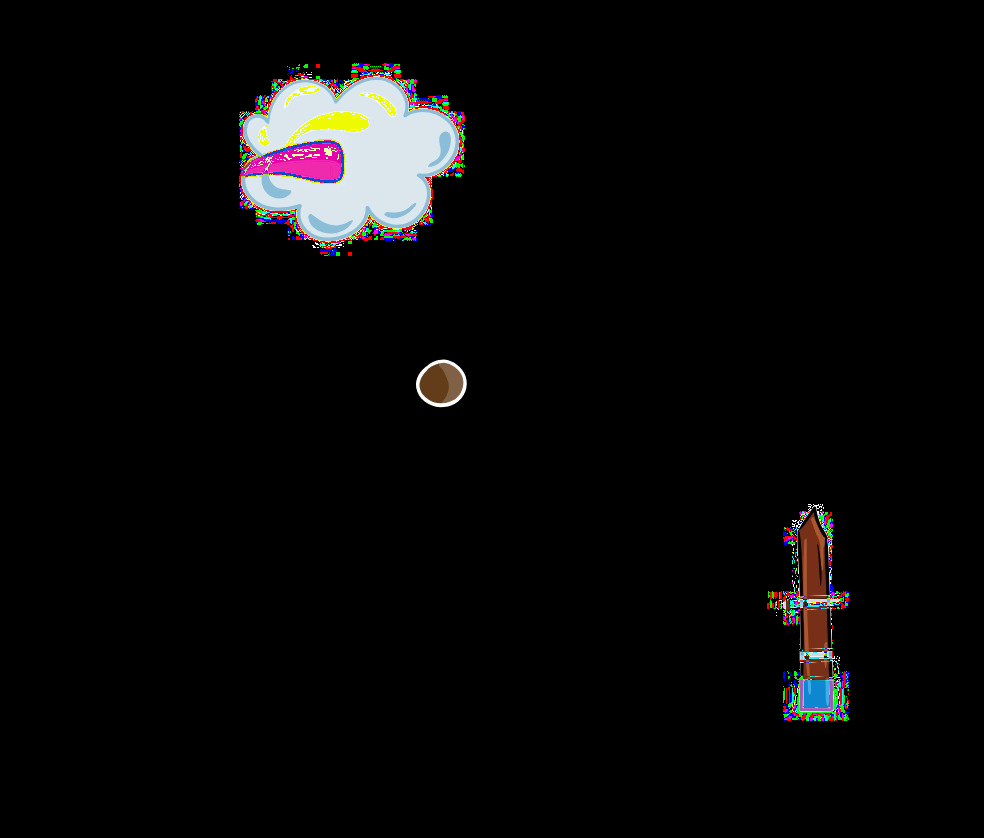

In [79]:
difference = Image.fromarray(difference_array)
difference.show()

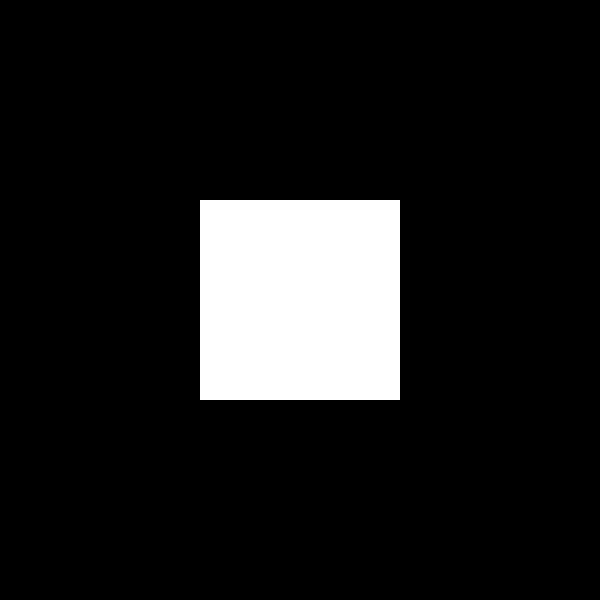

In [81]:
# Create images

square = np.zeros((600,600))
square[200:400, 200:400] = 255

square_img = Image.fromarray(square)
square_img = square_img.convert("L")

square_img.show()

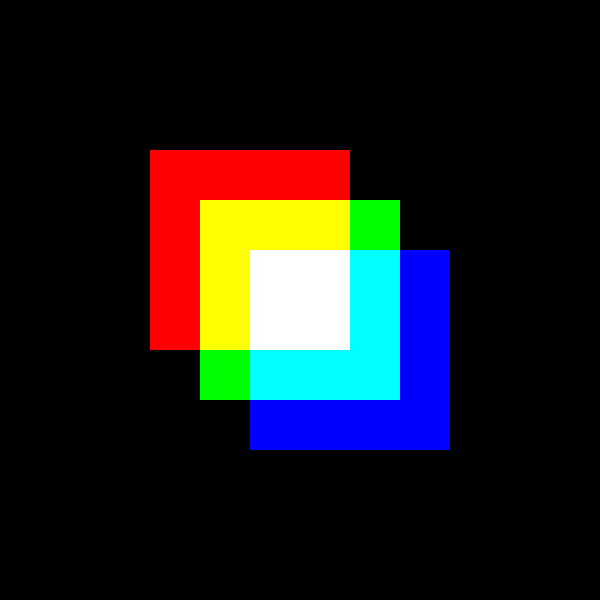

In [82]:
red = np.zeros((600,600))
green = np.zeros((600,600))
blue = np.zeros((600,600))

red[150:350, 150:350] = 255
green[200:400, 200:400] = 255
blue[250:450, 250:450] = 255

red_img = Image.fromarray(red).convert("L")
green_img = Image.fromarray(green).convert("L")
blue_img = Image.fromarray(blue).convert("L")

square_img = Image.merge("RGB", (red_img, green_img, blue_img))
square_img.show()